In [ ]:
import numpy as np
import csv

import matplotlib.pyplot as plt
seed = 1234

In [42]:
import pandas as pd

df = pd.read_csv("./train.csv", low_memory=False)
train = df.to_numpy()
df = pd.read_csv("./test.csv", low_memory=False)
test = df.to_numpy()

# reader = csv.reader(test_file)

In [ ]:
LIMIT = 10000

y_tr = train[:LIMIT, 1]
X_tr = train[:LIMIT, 2:]
y_te = train[-LIMIT:, 1]
X_te = train[-LIMIT:, 2:]

In [90]:
(X_tr[:100])

array([[14102100, 1005, 0, ..., 35, -1, 79],
       [14102100, 1005, 0, ..., 35, 100084, 79],
       [14102100, 1005, 0, ..., 35, 100084, 79],
       ...,
       [14102100, 1005, 0, ..., 35, -1, 79],
       [14102100, 1005, 0, ..., 35, -1, 79],
       [14102100, 1005, 0, ..., 35, -1, 79]],
      shape=(100, 22), dtype=object)

In [44]:
hex_to_int = np.vectorize(lambda x: int(x, 16))
X_tr[:, 3:12] = hex_to_int(X_tr[:, 3:12])
X_te[:, 3:12] = hex_to_int(X_te[:, 3:12])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

array([[-1.72868503, -0.07620704, -0.49485329, ..., -0.56970404,
        -0.91298959,  0.23534099],
       [-1.72868503, -0.07620704, -0.49485329, ..., -0.56970404,
         1.09498391,  0.23534099],
       [-1.72868503, -0.07620704, -0.49485329, ..., -0.56970404,
         1.09498391,  0.23534099],
       ...,
       [-1.72868503, -0.07620704, -0.49485329, ..., -0.56970404,
        -0.91298959,  0.23534099],
       [-1.72868503, -0.07620704, -0.49485329, ..., -0.56970404,
        -0.91298959,  0.23534099],
       [-1.72868503, -0.07620704, -0.49485329, ..., -0.56970404,
        -0.91298959,  0.23534099]], shape=(100, 22))

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l2")
model.fit(X_tr, y_tr.astype(np.float64))

LogisticRegression()

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log_loss", penalty=None, alpha=0.001, max_iter=1000)
model.fit(X_tr, y_tr.astype(np.float64))

SGDClassifier(alpha=0.001, loss='log_loss', penalty='l1')

In [83]:
(model.predict(X_te) != y_te.astype(np.float64)).mean()
model.predict_proba(X_te)[0]

array([9.99985114e-01, 1.48860902e-05])

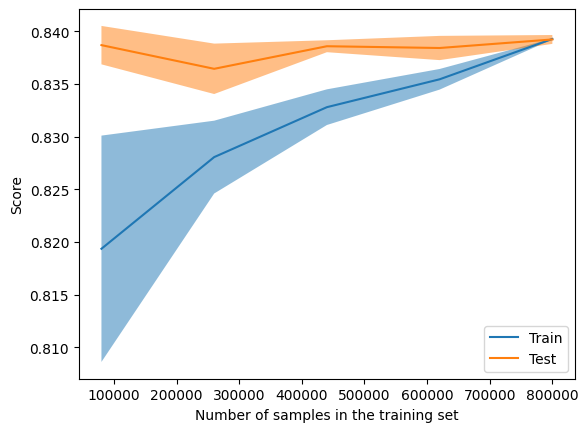

In [74]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_tr, y_tr.astype(np.float64))
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()